In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import random
import time


read data

In [ ]:
full_data=pd.read_excel('weatherHistory.xlsx', sheet_name='weatherHistory')

In [33]:
full_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
data=full_data[['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Wind Speed (km/h)']]

In [35]:
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Bearing (degrees),Visibility (km),Pressure (millibars),Wind Speed (km/h)
0,9.472222,7.388889,0.89,251,15.8263,1015.13,14.1197
1,9.355556,7.227778,0.86,259,15.8263,1015.63,14.2646
2,9.377778,9.377778,0.89,204,14.9569,1015.94,3.9284
3,8.288889,5.944444,0.83,269,15.8263,1016.41,14.1036
4,8.755556,6.977778,0.83,259,15.8263,1016.51,11.0446


rename headers for easy accessing

In [4]:
data=data.rename(columns={"Temperature (C)": "temp", "Wind Bearing (degrees)": "wind_bear","Visibility (km)":"visible","Apparent Temperature (C)":"app_temp","Pressure (millibars)":"press","Wind Speed (km/h)":"wind_speed"})

In [35]:
data.describe()

,temp,app_temp,Humidity,wind_bear,visible,press,wind_speed
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,187.509232,10.347325,1003.235956,10.810640
std,9.551546,10.696847,0.195473,107.383428,4.192123,116.969906,6.913571
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,116.000000,8.339800,1011.900000,5.828200
50%,12.000000,12.000000,0.780000,180.000000,10.046400,1016.450000,9.965900
75%,18.838889,18.838889,0.890000,290.000000,14.812000,1021.090000,14.135800
max,39.905556,39.344444,1.000000,359.000000,16.100000,1046.380000,63.852600


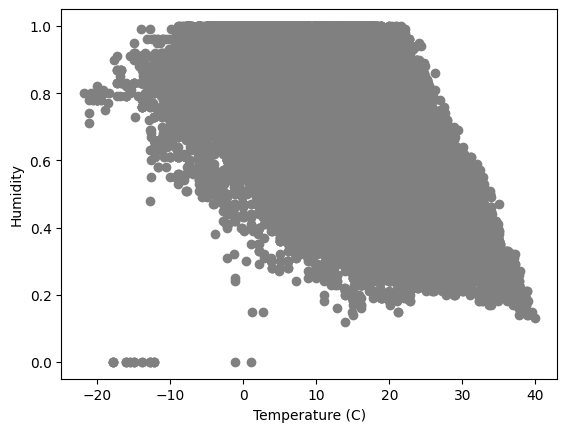

In [36]:
plt.scatter(data.temp, data.Humidity,  color='gray')
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.show()

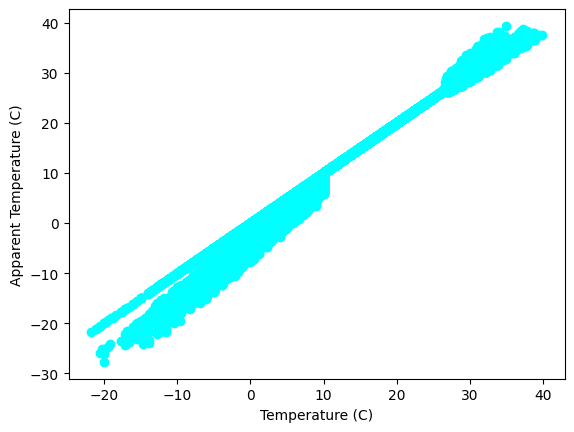

In [37]:
plt.scatter(data.temp, data.app_temp,  color='cyan')
plt.xlabel("Temperature (C)")
plt.ylabel("Apparent Temperature (C)")
plt.show()

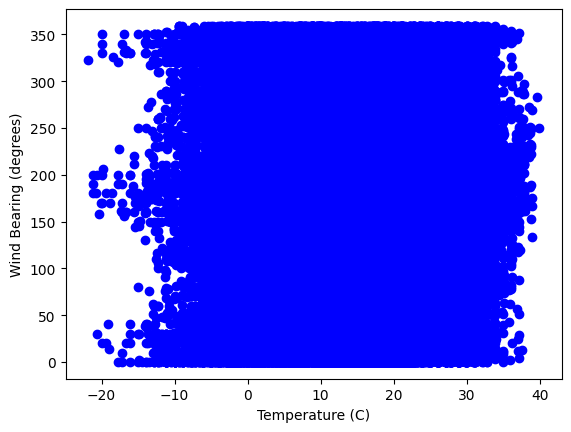

In [38]:
plt.scatter(data.temp, data.wind_bear,  color='blue')
plt.xlabel("Temperature (C)")
plt.ylabel("Wind Bearing (degrees)")
plt.show()

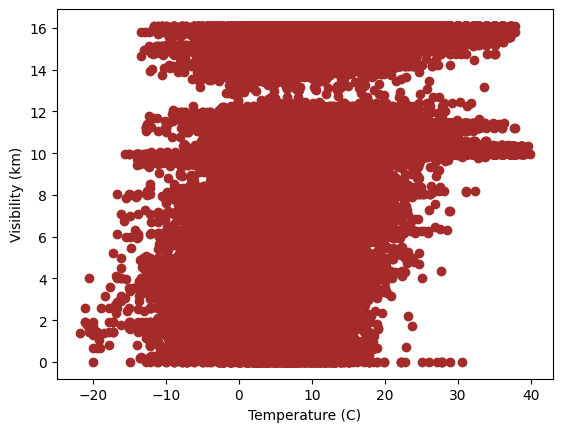

In [39]:
plt.scatter(data.temp, data.visible,  color='brown')
plt.xlabel("Temperature (C)")
plt.ylabel("Visibility (km)")
plt.show()

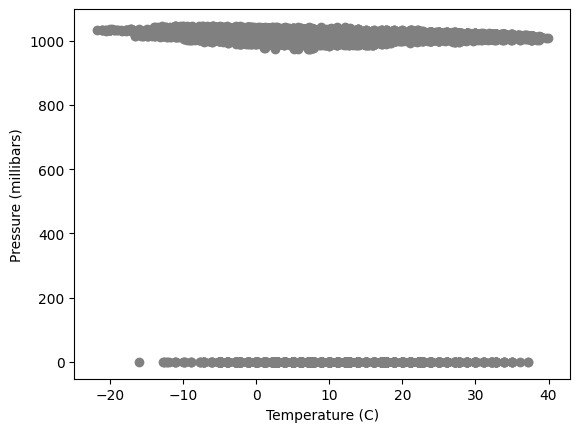

In [40]:
plt.scatter(data.temp, data.press,  color='gray')
plt.xlabel("Temperature (C)")
plt.ylabel("Pressure (millibars)")
plt.show()

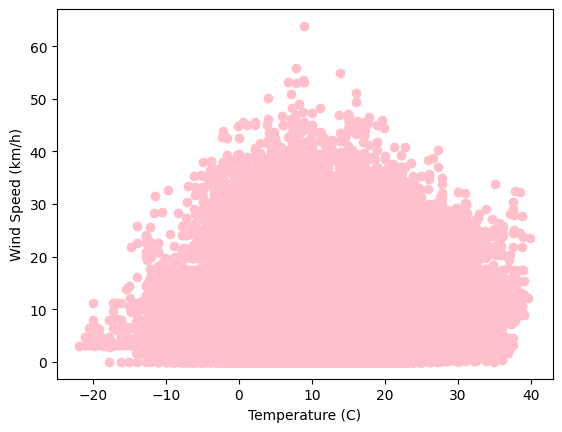

In [41]:
plt.scatter(data.temp, data.wind_speed,  color='pink')
plt.xlabel("Temperature (C)")
plt.ylabel("Wind Speed (km/h)")
plt.show()

# Separate the features and the target variable

In [5]:
# Separate the features and the target variable
features = data.drop('temp', axis=1)
print(type(features))
target = data['temp']

<class 'pandas.core.frame.DataFrame'>


# Standardize the features

In [6]:

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

 Split the data into training and test sets

In [11]:
train_features, test_features, train_target, test_target = train_test_split(
    features_standardized, target, test_size=0.2, random_state=42)
print(type(train_target))

<class 'pandas.core.series.Series'>


# Add a column of 1s for the bias term

In [12]:
train_features = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
test_features = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)

# Calculate the linear regression parameters using the normal equation

In [18]:
start_time = time.time()
# Normal equation: theta = (X^T * X)^(-1) * X^T * y
X = train_features
y = train_target

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_prediction_linear = X @ theta

# Calculate the running time
end_time = time.time()
running_time = end_time - start_time

print("Linear Regression Parameters:", theta)
print("Running Time:", running_time, "seconds")

<class 'numpy.ndarray'>
(77162, 7)
Linear Regression Parameters: [11.93045439  9.33366427 -0.27737168 -0.04338395  0.03617439 -0.0240555
  0.55147218]
Running Time: 0.004987239837646484 seconds


In [20]:
def step_size(t):
    epsilon = 1e-8  # Small epsilon value to prevent division by zero
    g_bar = 1
    for j in range(t):
        gt = np.abs(batch_gradients[j])
        g_bar = g_bar + (1 / (train_features.shape[0] / batch_sizes[i] + 1)) * np.sum(gt)
    alpha = 1 / (1 + g_bar + epsilon)
    return alpha

mini batch Stochastic Gradient Descent





In [ ]:
# Initialize weights to zero

train_target = np.array(train_target)
weights = np.zeros(train_features.shape[1])

# Set iteration parameters
num_epochs = 10000
batch_sizes = [10, 20, 30, 40, 50, 100]
clip_threshold = 1.0  # Set the threshold for gradient clipping


# Perform mini-batch stochastic gradient descent for each batch size
for i in range(len(batch_sizes)):
    batch_size = batch_sizes[i]
    print("Batch Size:", batch_size)
    errors = []
    batch_gradients = []  # List to store gradients for each mini-batch
    start_time1 = time.time()
    for epoch in range(1, num_epochs + 1):
        # Shuffle the training data
        indices = np.arange(train_features.shape[0])
        np.random.shuffle(indices)
        shuffled_features = train_features[indices]
        shuffled_target = train_target[indices]

        # Iterate over mini-batches
        for k in range(0, train_features.shape[0], batch_size):
            X_batch = shuffled_features[k:k + batch_size]
            y_batch = shuffled_target[k:k + batch_size]

            # Compute mini-batch gradient
            gradients = np.dot(X_batch.T, np.dot(X_batch, weights) - y_batch)

            # Apply gradient clipping
            clipped_gradients = np.clip(gradients, -clip_threshold, clip_threshold)

            batch_gradients.append(clipped_gradients)  # Store the computed gradients

            # Update the weights
            alpha = step_size(epoch)
            weights -= alpha * clipped_gradients

        # Calculate error on test data
        y_pred = np.dot(test_features, weights)
        error = np.mean((y_pred - test_target) ** 2)
        errors.append(error)
        
        
    end_time1 = time.time()
    running_time1 = end_time1 - start_time1

    print("Running Time:", running_time1, "seconds")
    print("Errors:", errors)
    print("Best Error:", min(errors))

#polynomial regression

In [20]:
degree = 2  # Degree of the polynomial regression
X_poly = np.column_stack([train_features**i for i in range(1, degree+1)])

caculate theta or coefficients

In [21]:
y = train_target
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

In [22]:
y_pred = X_poly @ coefficients
print(y_pred)

[-330.50053266 -342.60902831 -329.55573098 ... -337.00020687 -329.21726958
 -343.00057255]


In [23]:
X_test_poly = np.column_stack([test_features**i for i in range(1, degree+1)])

In [24]:
y_test_pred = X_test_poly @ coefficients


In [25]:
mse = np.mean((test_target - y_test_pred)**2)
print(mse)

120654.62586468618


mini batch Stochastic Gradient Descent
for polynomial regression

In [26]:

weights = np.zeros(X_poly.shape[1])

# Set iteration parameters
num_epochs = 10000
batch_sizes = [10, 20, 30, 40, 50, 100]
clip_threshold = 1.0  # Set the threshold for gradient clipping



# Perform mini-batch stochastic gradient descent for each batch size
for i in range(len(batch_sizes)):
    batch_size = batch_sizes[i]
    print("Batch Size:", batch_size)
    errors = []
    batch_gradients = []  # List to store gradients for each mini-batch

    for epoch in range(1, num_epochs + 1):
        # Shuffle the training data
        indices = np.arange(X_poly.shape[0])
        np.random.shuffle(indices)
        shuffled_features = X_poly[indices]
        shuffled_target = train_target[indices]

        # Iterate over mini-batches
        for k in range(0, X_poly.shape[0], batch_size):
            X_batch = shuffled_features[k:k + batch_size]
            y_batch = shuffled_target[k:k + batch_size]

            # Compute mini-batch gradient
            gradients = np.dot(X_batch.T, np.dot(X_batch, weights) - y_batch)

            # Apply gradient clipping
            clipped_gradients = np.clip(gradients, -clip_threshold, clip_threshold)

            batch_gradients.append(clipped_gradients)  # Store the computed gradients

            # Update the weights
            alpha = step_size(epoch)
            weights -= alpha * clipped_gradients

        # Calculate error on test data
        y_pred1 = np.dot(X_test_poly, weights)
        error = np.mean((y_pred1 - test_target) ** 2)
        errors.append(error)

    print("Errors:", errors)
    print("Best Error:", min(errors))

Batch Size: 10
Errors: [9.702600570506023, 21.749042284063755, 17.125151108865374, 39.72362399803067, 19.339327503422183, 19.80033131749754, 52.073249472269005, 15.804706641932292, 7.514731430490828, 10.441767122489372, 12.213765347243847, 39.702772150065144, 27.992663081016477, 40.75453091547165, 15.932839851332801, 10.900442391139709, 7.451525965062125, 22.579153551996168, 19.05715181458346, 14.016370870075246, 2.7670497017935283, 27.553986122195855, 4.992840014781721, 11.006896329362966, 24.94848651904828, 35.91112894353799, 6.404307032470347, 19.325020374116885, 11.92653830672175, 14.140764042241944, 8.030867453833299, 6.255861135995729, 78.65054746740103, 10.502996567158307, 10.884270794682065, 25.709484309864738, 17.606832126664056, 22.6395886052197, 34.69794530044901, 100.00257070363388, 18.446279044960644, 15.652117747443368, 16.594669817293514, 9.427447794869215, 8.096871596009489, 4.867178605840917, 56.98003261771927, 22.95751515254619, 27.568880058631038, 16.641712672381313,

#adagard

In [28]:
def adagrad_step_size(epoch, learning_rate, sum_squared_gradients):
    return learning_rate / np.sqrt(sum_squared_gradients + 1e-8)

weights = np.zeros(X_poly.shape[1])

# Set iteration parameters
num_epochs = 10000
learning_rate = 0.001
batch_sizes = [10, 20, 30, 40, 50, 100]
clip_threshold = 1.0  # Set the threshold for gradient clipping

# Perform mini-batch stochastic gradient descent for each batch size
for i in range(len(batch_sizes)):
    batch_size = batch_sizes[i]
    print("Batch Size:", batch_size)
    errors = []
    batch_gradients = []  # List to store gradients for each mini-batch
    sum_squared_gradients = np.zeros(X_poly.shape[1])  # Initialize sum of squared gradients

    for epoch in range(1, num_epochs + 1):
        # Shuffle the training data
        indices = np.arange(X_poly.shape[0])
        np.random.shuffle(indices)
        shuffled_features = X_poly[indices]
        shuffled_target = train_target[indices]

        # Iterate over mini-batches
        for k in range(0, X_poly.shape[0], batch_size):
            X_batch = shuffled_features[k:k + batch_size]
            y_batch = shuffled_target[k:k + batch_size]

            # Compute mini-batch gradient
            gradients = np.dot(X_batch.T, np.dot(X_batch, weights) - y_batch)

            # Apply gradient clipping
            clipped_gradients = np.clip(gradients, -clip_threshold, clip_threshold)

            batch_gradients.append(clipped_gradients)  # Store the computed gradients

            # Update sum of squared gradients
            sum_squared_gradients += gradients**2

            # Update the weights using AdaGrad step size
            alpha = adagrad_step_size(epoch, learning_rate, sum_squared_gradients)
            weights -= alpha * clipped_gradients

        # Calculate error on test data
        y_pred1 = np.dot(X_test_poly, weights)
        error = np.mean((y_pred1 - test_target) ** 2)
        errors.append(error)

    print("Errors:", errors)
    print("Best Error:", min(errors))

Batch Size: 10
Errors: [230.23807250946146, 229.07095157864316, 228.1735712424133, 227.4209634733096, 226.75653160866733, 226.15771067001452, 225.60862521949673, 225.09527354674697, 224.61432635101278, 224.15966354565205, 223.7278860423729, 223.3165743589931, 222.92111137542682, 222.54059443299468, 222.1744046069433, 221.81938429910858, 221.47594056361373, 221.14255976679166, 220.81855702803324, 220.50246351738446, 220.19512682172973, 219.89525916105444, 219.6023362290883, 219.31491236200546, 219.03439809614432, 218.75872743307704, 218.48857531645655, 218.22370238535572, 217.9638959328626, 217.70895181551646, 217.45831477164774, 217.211469989318, 216.9685065216406, 216.7294028119898, 216.49396156571134, 216.26178644687843, 216.0330120293551, 215.80683810065074, 215.58415195389813, 215.3640439855546, 215.14682925539086, 214.9324372721284, 214.72052181575333, 214.51134758881318, 214.3046470866966, 214.100396772824, 213.89838000942603, 213.69811742093518, 213.4999589160606, 213.3043721839

#use scikit-model

In [30]:
regr = LinearRegression()

regr.fit(train_features, train_target)
print(regr.score(test_features, test_target))

0.9902437799520607


In [34]:
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(train_features)
test_poly2 = poly2.fit_transform(test_features)
poly2.fit(X_poly2, train_target)
lin2 = LinearRegression()
lin2.fit(X_poly2, train_target)
print(lin2.score(test_poly2, test_target))

0.9967998963103752
